In [33]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import einops
from mpl_toolkits.axes_grid1 import make_axes_locatable

directory_path = "."  # Replace with your desired directory path

files = os.listdir(directory_path)

filenames = [s for s in files if s.endswith('.json')]
file_index = [7,11,1,9,13,5,6,10,0,8,12,4]
filenames

['result_16_1_init_5e3.json',
 'result_16_1_init_5e3_full.json',
 'result_16_2_init_15e3_full.json',
 'result_16_2_init_2e3_full.json',
 'result_16_2_init_5e3.json',
 'result_16_2_init_5e3_full.json',
 'result_4_1_init_5e3.json',
 'result_4_1_init_5e3_full.json',
 'result_4_2_init_5e3.json',
 'result_4_2_init_5e3_full.json',
 'result_8_1_init_5e3.json',
 'result_8_1_init_5e3_full.json',
 'result_8_2_init_5e3.json',
 'result_8_2_init_5e3_full.json']

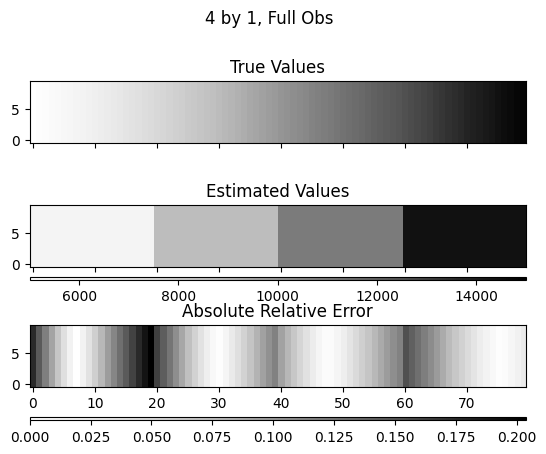

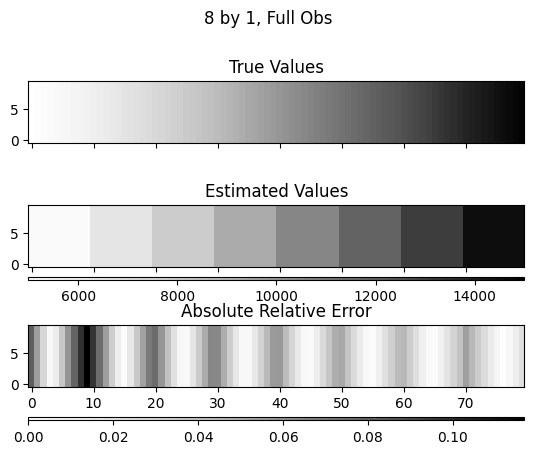

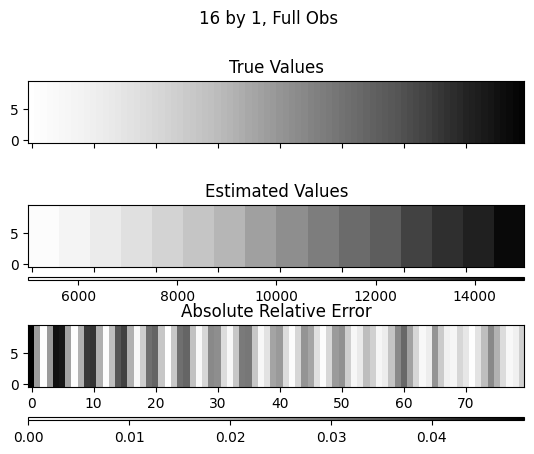

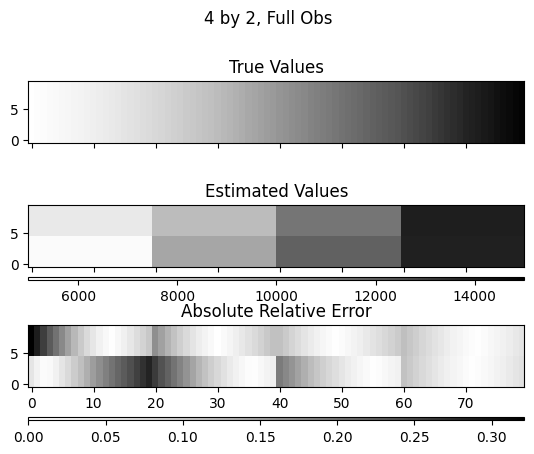

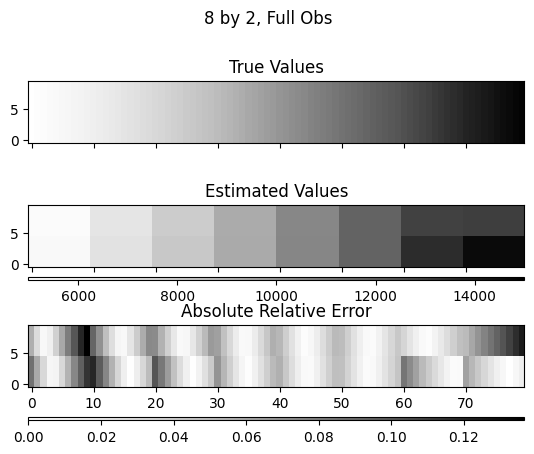

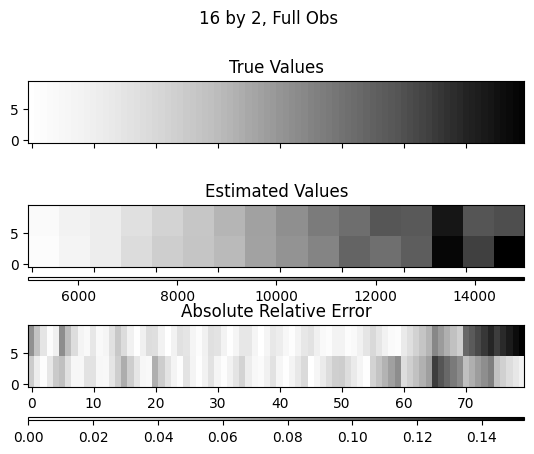

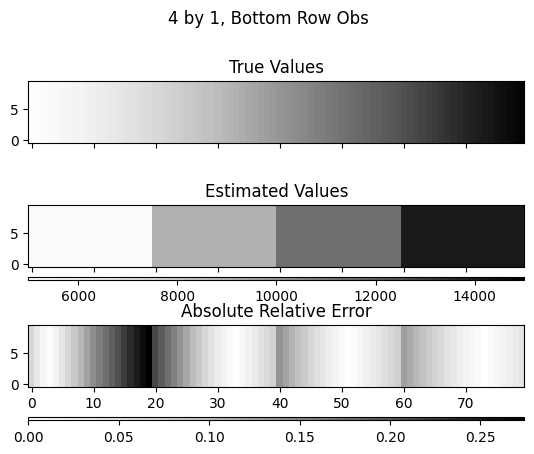

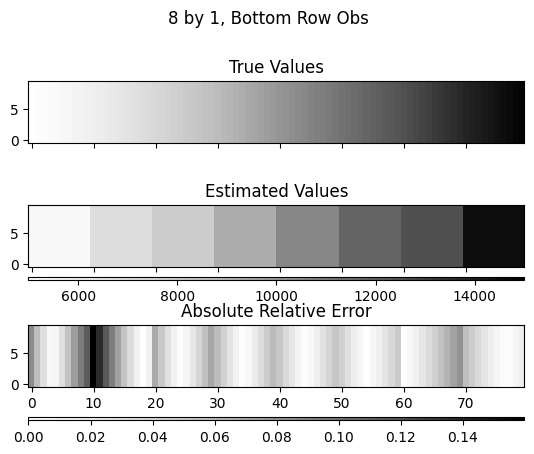

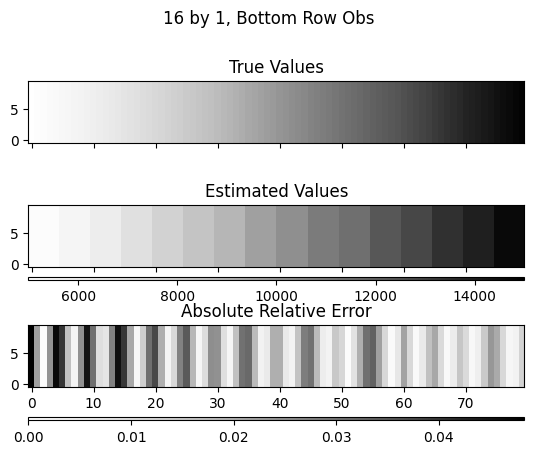

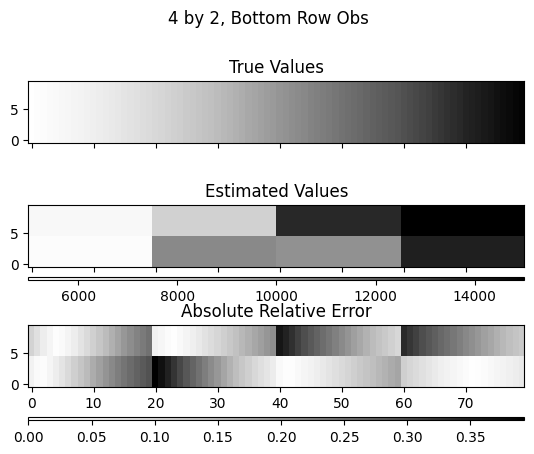

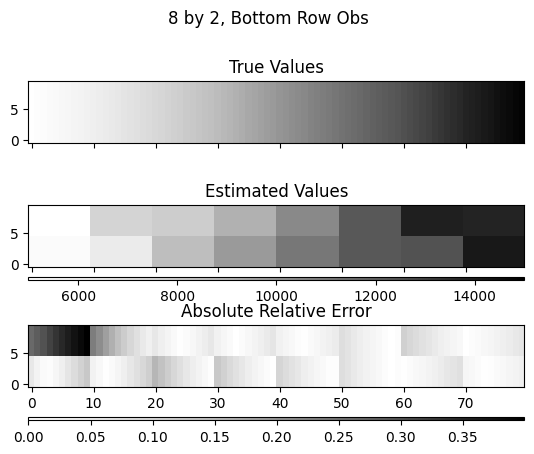

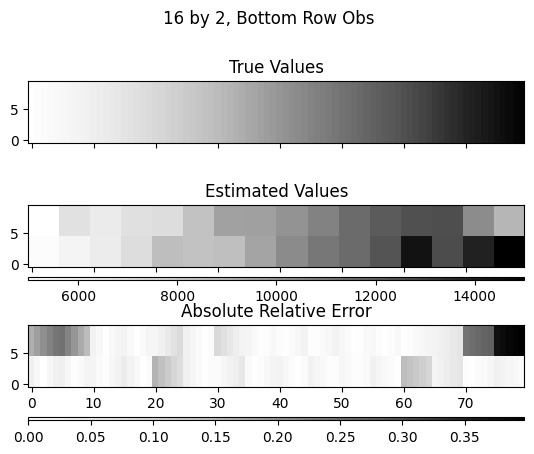

In [34]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import einops
from mpl_toolkits.axes_grid1 import make_axes_locatable

directory_path = "."  # Replace with your desired directory path

files = os.listdir(directory_path)

filenames = [s for s in files if s.endswith('.json')]
file_index = [7,11,1,9,13,5,6,10,0,8,12,4]
filenames_reordered = [filenames[i] for i in file_index]
filenames = filenames_reordered
pattern = r"result_(\d+)_(\d+)_init"

E_hists = []
results = []
avg_err = []


Nx = 80
Ny = 10
n_particles = Nx * Ny
E_true = np.zeros(n_particles)

for i in range(n_particles):
    col = i % Nx
    E_true[i] = 5000 + 10000*(col / Nx)


for name in filenames:
    with open(name) as json_file:
        result = json.load(json_file)['E_hist'][-1]        
    
    results.append(result)

    match = re.search(pattern, name)
    n_blocks_x = int(match.group(1))
    n_blocks_y = int(match.group(2))

    n_blocks = n_blocks_y * n_blocks_x
    block_nx = int(Nx / n_blocks_x)
    block_ny = int(Ny / n_blocks_y)

    if name[-9:-5] == 'full':
        obs = 'Full Obs'
    else:
        obs = 'Bottom Row Obs'

    E = np.zeros(n_particles)
    for i in range(Nx):
        for j in range(Ny):
            block_index_x = i // block_nx
            block_index_y = j // block_ny
            E[j*Nx+i] = result[block_index_x + block_index_y * n_blocks_x]

    E_true_reshape = einops.rearrange(E_true, "(y x) -> x y", y=Ny)
    E_reshape = einops.rearrange(E, "(y x) -> x y", y=Ny)
    error = np.abs(np.divide((E_reshape - E_true_reshape), E_true_reshape))
    avg_err.append(np.mean(error.flatten()))

    fig, axs = plt.subplots(3, sharex=True, sharey=True)
    fig.suptitle(str(n_blocks_x) + ' by ' + str(n_blocks_y) + ", " + obs)
    axs[0].imshow(E_true_reshape.transpose(), origin='lower', cmap='Greys', vmin=5000, vmax = 15000)
    axs[0].set_title('True Values')
    
    im1 = axs[1].imshow(E_reshape.transpose(), origin='lower', cmap='Greys', vmin=5000, vmax = 15000)
    axs[1].set_title('Estimated Values')
    divider1 = make_axes_locatable(axs[1])
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.1)
    fig.colorbar(im1, cax=cax1, orientation='horizontal')

    im2 = axs[2].imshow(error.transpose(), origin='lower', cmap='Greys', vmin=0)
    axs[2].set_title('Absolute Relative Error')
    divider2 = make_axes_locatable(axs[2])
    cax2 = divider2.append_axes("bottom", size="5%", pad=0.3)
    fig.colorbar(im2, cax=cax2, orientation='horizontal')
    plt.show()
    

    


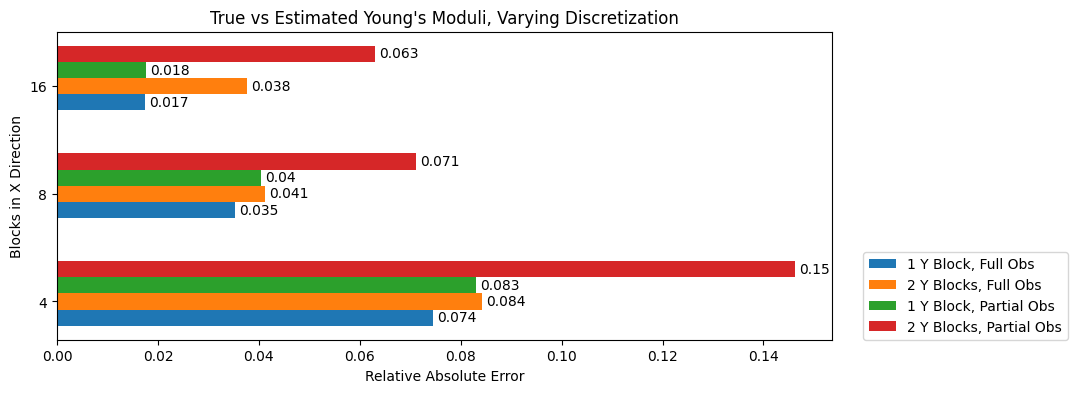

In [29]:
i_1 = [6,7,8]
i_1_full = [0,1,2]
i_2_full = [3,4,5]
i_2 = [9,10,11]

species = ("4", "8", "16")
penguin_means = {
    '1 Y Block, Full Obs': [avg_err[i] for i in i_1_full],
    '2 Y Blocks, Full Obs': [avg_err[i] for i in i_2_full],
    '1 Y Block, Partial Obs': [avg_err[i] for i in i_1],
    '2 Y Blocks, Partial Obs':[avg_err[i] for i in i_2],
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10,4))

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt='%.2g')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Relative Absolute Error')
ax.set_title('True vs Estimated Young\'s Moduli, Varying Discretization')
ax.set_yticks(x + width, species)
ax.legend(loc=(1.04,0))
# ax.set_ylim(0, 250)
ax.set_ylabel('Blocks in X Direction')
plt.show()

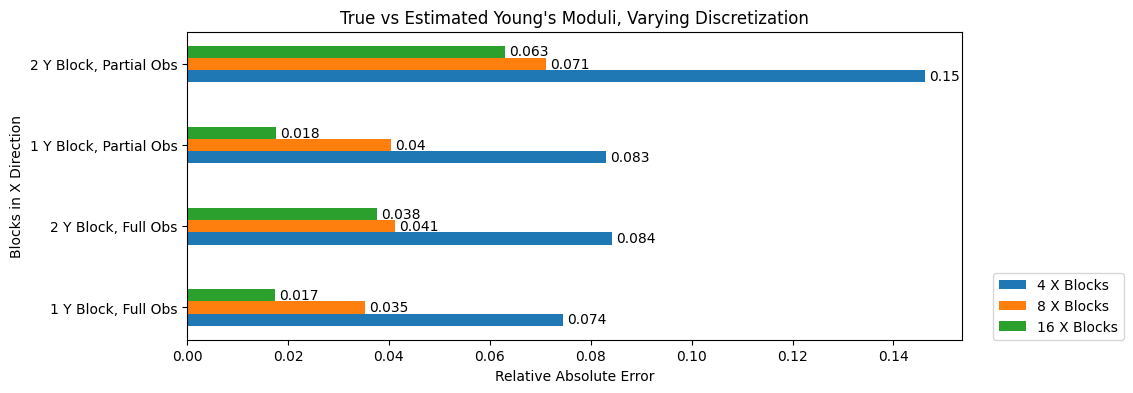

In [31]:
i_4 = [0,3,6,9]
i_8 = [1,4,7,10]
i_16 = [2,5,8,11]


species = (
    "1 Y Block, Full Obs", 
    "2 Y Block, Full Obs", 
    "1 Y Block, Partial Obs",
    "2 Y Block, Partial Obs",
    )
penguin_means = {
    '4 X Blocks': [avg_err[i] for i in i_4],
    '8 X Blocks': [avg_err[i] for i in i_8],
    '16 X Blocks': [avg_err[i] for i in i_16],
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10,4))

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt='%.2g')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Relative Absolute Error')
ax.set_title('True vs Estimated Young\'s Moduli, Varying Discretization')
ax.set_yticks(x + width, species)
ax.legend(loc=(1.04,0))
# ax.set_ylim(0, 250)
ax.set_ylabel('Blocks in X Direction')
plt.show()

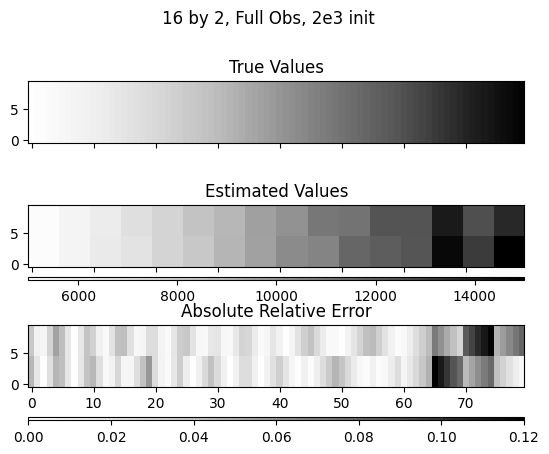

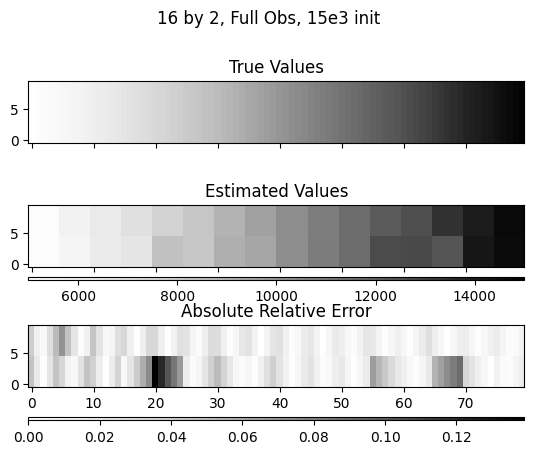

In [40]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import einops
from mpl_toolkits.axes_grid1 import make_axes_locatable

directory_path = "."  # Replace with your desired directory path

files = os.listdir(directory_path)

filenames = [s for s in files if s.endswith('.json')]
file_index = [3,2]
filenames_reordered = [filenames[i] for i in file_index]
filenames = filenames_reordered
pattern = r"result_(\d+)_(\d+)_init"

E_hists = []
results = []
avg_err = []


Nx = 80
Ny = 10
n_particles = Nx * Ny
E_true = np.zeros(n_particles)

for i in range(n_particles):
    col = i % Nx
    E_true[i] = 5000 + 10000*(col / Nx)


for name in filenames:
    with open(name) as json_file:
        result = json.load(json_file)['E_hist'][-1]        
    
    results.append(result)

    match = re.search(pattern, name)
    n_blocks_x = int(match.group(1))
    n_blocks_y = int(match.group(2))

    n_blocks = n_blocks_y * n_blocks_x
    block_nx = int(Nx / n_blocks_x)
    block_ny = int(Ny / n_blocks_y)

    if name[-9:-5] == 'full':
        obs = 'Full Obs'
    else:
        obs = 'Bottom Row Obs'

    if name[-14:-10] == "15e3":
        start = "15e3"
    else:
        start = "2e3"

    E = np.zeros(n_particles)
    for i in range(Nx):
        for j in range(Ny):
            block_index_x = i // block_nx
            block_index_y = j // block_ny
            E[j*Nx+i] = result[block_index_x + block_index_y * n_blocks_x]

    E_true_reshape = einops.rearrange(E_true, "(y x) -> x y", y=Ny)
    E_reshape = einops.rearrange(E, "(y x) -> x y", y=Ny)
    error = np.abs(np.divide((E_reshape - E_true_reshape), E_true_reshape))
    avg_err.append(np.mean(error.flatten()))

    fig, axs = plt.subplots(3, sharex=True, sharey=True)
    fig.suptitle(str(n_blocks_x) + ' by ' + str(n_blocks_y) + ", " + obs + ", " + start + " init")
    axs[0].imshow(E_true_reshape.transpose(), origin='lower', cmap='Greys', vmin=5000, vmax = 15000)
    axs[0].set_title('True Values')
    
    im1 = axs[1].imshow(E_reshape.transpose(), origin='lower', cmap='Greys', vmin=5000, vmax = 15000)
    axs[1].set_title('Estimated Values')
    divider1 = make_axes_locatable(axs[1])
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.1)
    fig.colorbar(im1, cax=cax1, orientation='horizontal')

    im2 = axs[2].imshow(error.transpose(), origin='lower', cmap='Greys', vmin=0)
    axs[2].set_title('Absolute Relative Error')
    divider2 = make_axes_locatable(axs[2])
    cax2 = divider2.append_axes("bottom", size="5%", pad=0.3)
    fig.colorbar(im2, cax=cax2, orientation='horizontal')
    plt.show()
    

    


In [14]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import einops
from mpl_toolkits.axes_grid1 import make_axes_locatable

directory_path = "."  # Replace with your desired directory path

files = os.listdir(directory_path)

filenames = [s for s in files if s.endswith('.json')]
filenames

['result_16_1_init_5e3.json',
 'result_16_1_init_5e3_full.json',
 'result_16_2_init_15e3_full.json',
 'result_16_2_init_15e3_full_reverse.json',
 'result_16_2_init_2e3_full.json',
 'result_16_2_init_5e3.json',
 'result_16_2_init_5e3_full.json',
 'result_16_2_init_5e3_full_reverse.json',
 'result_4_1_init_5e3.json',
 'result_4_1_init_5e3_full.json',
 'result_4_2_init_5e3.json',
 'result_4_2_init_5e3_full.json',
 'result_8_1_init_5e3.json',
 'result_8_1_init_5e3_full.json',
 'result_8_2_init_5e3.json',
 'result_8_2_init_5e3_full.json']

In [12]:
name[-22:-18]

'15e3'

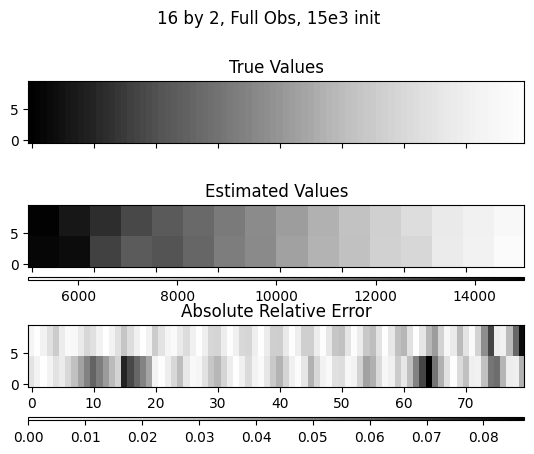

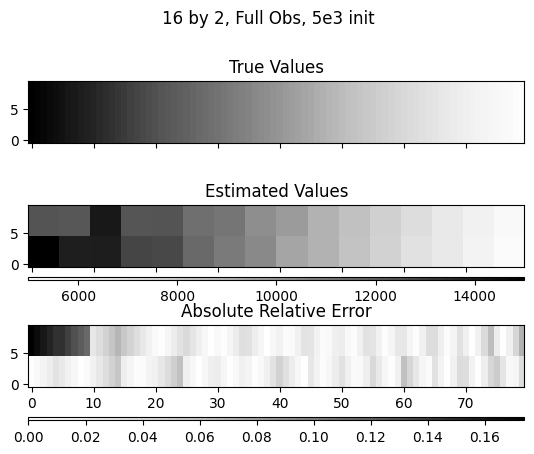

: 

In [15]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import einops
from mpl_toolkits.axes_grid1 import make_axes_locatable

directory_path = "."  # Replace with your desired directory path

files = os.listdir(directory_path)

filenames = [s for s in files if s.endswith('.json')]
file_index = [3,7]
filenames_reordered = [filenames[i] for i in file_index]
filenames = filenames_reordered
pattern = r"result_(\d+)_(\d+)_init"

E_hists = []
results = []
avg_err = []


Nx = 80
Ny = 10
n_particles = Nx * Ny
E_true = np.zeros(n_particles)

for i in range(n_particles):
    col = i % Nx
    E_true[i] = 15000 - 10000*(col / Nx)


for name in filenames:
    with open(name) as json_file:
        result = json.load(json_file)['E_hist'][-1]        
    
    results.append(result)

    match = re.search(pattern, name)
    n_blocks_x = int(match.group(1))
    n_blocks_y = int(match.group(2))

    n_blocks = n_blocks_y * n_blocks_x
    block_nx = int(Nx / n_blocks_x)
    block_ny = int(Ny / n_blocks_y)

    if name[-17:-13] == 'full':
        obs = 'Full Obs'
    else:
        obs = 'Bottom Row Obs'

    if name[-22:-18] == "15e3":
        start = "15e3"
    else:
        start = "5e3"

    E = np.zeros(n_particles)
    for i in range(Nx):
        for j in range(Ny):
            block_index_x = i // block_nx
            block_index_y = j // block_ny
            E[j*Nx+i] = result[block_index_x + block_index_y * n_blocks_x]

    E_true_reshape = einops.rearrange(E_true, "(y x) -> x y", y=Ny)
    E_reshape = einops.rearrange(E, "(y x) -> x y", y=Ny)
    error = np.abs(np.divide((E_reshape - E_true_reshape), E_true_reshape))
    avg_err.append(np.mean(error.flatten()))

    fig, axs = plt.subplots(3, sharex=True, sharey=True)
    fig.suptitle(str(n_blocks_x) + ' by ' + str(n_blocks_y) + ", " + obs + ", " + start + " init")
    axs[0].imshow(E_true_reshape.transpose(), origin='lower', cmap='Greys', vmin=5000, vmax = 15000)
    axs[0].set_title('True Values')
    
    im1 = axs[1].imshow(E_reshape.transpose(), origin='lower', cmap='Greys', vmin=5000, vmax = 15000)
    axs[1].set_title('Estimated Values')
    divider1 = make_axes_locatable(axs[1])
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.1)
    fig.colorbar(im1, cax=cax1, orientation='horizontal')

    im2 = axs[2].imshow(error.transpose(), origin='lower', cmap='Greys', vmin=0)
    axs[2].set_title('Absolute Relative Error')
    divider2 = make_axes_locatable(axs[2])
    cax2 = divider2.append_axes("bottom", size="5%", pad=0.3)
    fig.colorbar(im2, cax=cax2, orientation='horizontal')
    plt.show()
    

    
